# Visualization of the constraint

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import scipy.stats as stats

In [22]:
d = np.array([0.017, 0.03 , 0.03 , 0.017, 0.03 , 0.002, 0.017, 0.025, 0.017])
keys = ['A1', 'A2i', 'A2j', "E1", "E2", "E4", "F1", "F2", "M1"]
d_dict = { k: dd for (k, dd) in zip(keys, d)}

a = -0.350

## single qubit constraint

Text(0.5, 0, 'Frequency (GHz)')

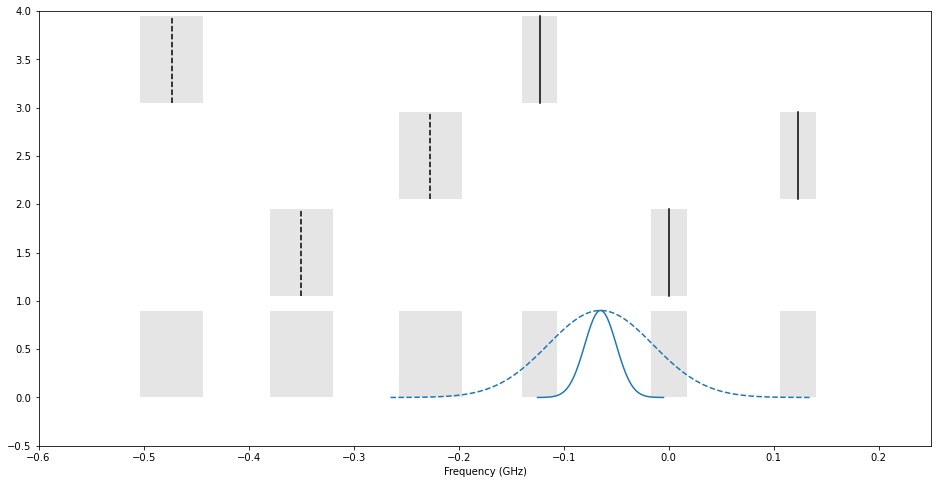

In [42]:
fig, ax = plt.subplots(figsize=(16, 8))


freqs = [0, 0.123, -.123]


for k, f in enumerate(freqs):
    
    # plot the frequencies
    ax.plot([f,f], [k+1.05, k+1.95], 'k-')
    ax.plot([f+a,f+a], [k+1.05, k+1.95], 'k--')
    # patch for the avoid collision
    ax.add_patch(Rectangle((f-d_dict['A1'], k+1.05), 2*d_dict['A1'], .9,
             facecolor = 'Gray',
            alpha= 0.2,
             fill=True,
             lw=5))

    ax.add_patch(Rectangle((f-0.350-d_dict['A2i'], k+1.05), 2*d_dict['A2i'], .9,
                 facecolor = 'Gray',
                 alpha= 0.2,
                 fill=True,
                 lw=5))

    ax.add_patch(Rectangle((f-d_dict['A1'], 0), 2*d_dict['A1'], .9,
             facecolor = 'Gray',
            alpha= 0.2,
             fill=True,
             lw=5))

    ax.add_patch(Rectangle((f-0.350-d_dict['A2i'], 0), 2*d_dict['A2i'], .9,
                 facecolor = 'Gray',
                 alpha= 0.2,
                 fill=True,
                 lw=5))
# ax.add_patch(Rectangle((neighbor['freq'] + neighbor['a']-d_dict['A2i'], n+0.55), 2*d_dict['A2i'], 0.9,
#                         facecolor = 'Gray', alpha= 0.2, fill=True, lw=5))


for sigma, ls in zip([0.015, 0.05], ['-', '--']):

    mu = - 0.065
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    y /= np.max(y)
    ax.plot(x, 0.0+ 0.9*y, color=f'C{0}', linestyle=ls)


ax.set_xlim(-0.6, 0.25)
ax.set_ylim(-0.5, 4)
ax.set_xlabel("Frequency (GHz)")